In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [71]:
media_company = pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/e0ff5f10-ad77-413e-8eb7-56530e90d9a6/mediacompany.csv")
media_company.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [72]:
pd.read_csv("https://cdn.upgrad.com/UpGrad/temp/291e7684-aea2-4ea3-8926-624c4f72fd7f/DataDictionary_mediacompany.csv")

,Variable,Explaination
0,Views_show,Number of times the show was viewed
1,Visitors,"Number of visitors who browsed the platform, b..."
2,Views_platform,Number of times a video was viewed on the plat...
3,Ad_impression,Proxy for marketing budget. Represents number ...
4,Cricket_match_india,If a cricket match was being played. 1 indicat...
5,Character_A,Describes presence of Character A. 1 indicates...


In [73]:
media_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [74]:
media_company.drop(columns='Unnamed: 7', axis=1, inplace=True)

In [75]:
media_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


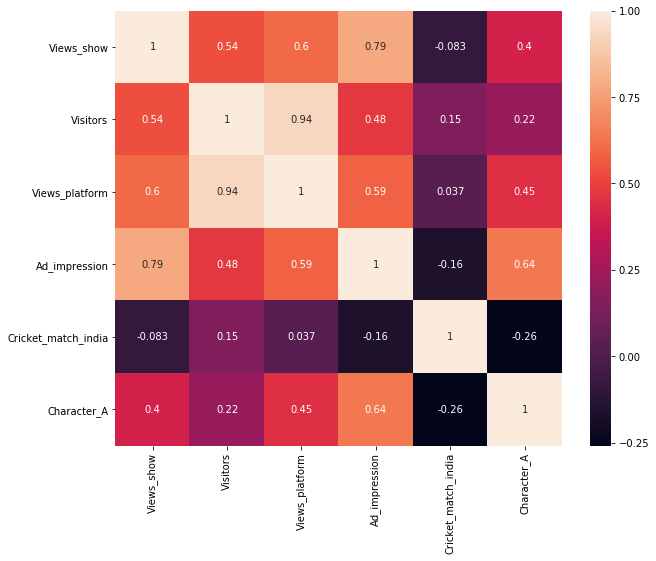

In [76]:
# media_company.corr()

plt.figure(figsize=(10,8))
sns.heatmap(media_company.corr(), annot=True)
plt.show()

In [77]:
media_company.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [78]:
from datetime import date
media_company['Date'] = pd.to_datetime(media_company['Date']).dt.date
d0 = date(2017, 2, 28)
d1 = media_company.Date
delta = d1 - d0
media_company['day'] = delta
media_company.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [79]:
# ===> cleanup the data
media_company['day'] = media_company['day'].astype(str)
media_company['day'] = media_company['day'].map(lambda x: x[0:2])
media_company['day'] = media_company['day'].astype(int)

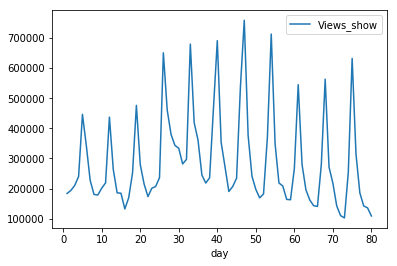

In [80]:
media_company.plot.line(x='day', y='Views_show')

In [81]:
media_company['weekday'] = (media_company['day']+3)%7
media_company.weekday.replace(0,7, inplace=True)
media_company['weekday'] = media_company['weekday'].astype(int)
media_company.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


### Building model

In [82]:
X = media_company[['Visitors', 'weekday']]
Y = media_company[['Views_show']]

In [84]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
X_Const = sm.add_constant(X)
lr_stats = sm.OLS(Y, X_Const).fit()
print(lr_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 20 May 2019   Prob (F-statistic):           8.01e-12
Time:                        20:31:14   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [90]:
# ====> Add weekend/weekeday variables
def weekend_var(x):
    if x%7 == 5: return 1
    elif x%7 == 4: return 1
    else : return 0
    return i

media_company['weekend'] = [weekend_var(i) for i in media_company['day']]
media_company.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


#### Model 2:

In [98]:
X = media_company[['Visitors', 'weekend']]
Y = media_company[['Views_show']]


In [99]:
lr_2 = LinearRegression()
lr_2.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [100]:
X_Const = sm.add_constant(X)
lrs_2 = sm.OLS(Y, X_Const).fit()
print(lrs_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 20 May 2019   Prob (F-statistic):           2.51e-12
Time:                        20:47:08   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

#### Running the model with Character_A:

In [101]:
X = media_company[['Visitors', 'weekend', 'Character_A']]
Y = media_company[['Views_show']]


In [102]:
lr_2 = LinearRegression()
lr_2.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
X_Const = sm.add_constant(X)
lrs_2 = sm.OLS(Y, X_Const).fit()
print(lrs_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 20 May 2019   Prob (F-statistic):           1.53e-14
Time:                        20:48:36   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [105]:
media_company['Lag_Views'] = np.roll(media_company['Views_show'], 1)
media_company.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [111]:
media_company.replace(108961, 0, inplace=True)

In [112]:
media_company.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


### Model 3 with lag views

In [114]:
X = media_company[['Visitors', 'weekend', 'Character_A', 'Lag_Views']]
Y = media_company[['Views_show']]

In [116]:
lr_3 = LinearRegression()
lr_3.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
X_Const = sm.add_constant(X)
lrs_3 = sm.OLS(Y, X_Const).fit()
print(lrs_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     52.66
Date:                Mon, 20 May 2019   Prob (F-statistic):           4.78e-21
Time:                        21:01:00   Log-Likelihood:                -1016.6
No. Observations:                  80   AIC:                             2043.
Df Residuals:                      75   BIC:                             2055.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.401e+04   7.57e+04     -0.317      

In [121]:
media_company.corr()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend,Lag_Views
Views_show,1.000000,0.526401,0.594581,0.781067,-0.108245,0.403973,-0.052945,-0.570116,0.656598,0.420601
Visitors,0.526401,1.000000,0.935832,0.478598,0.147210,0.223093,0.738599,-0.259023,0.470870,0.200710
Views_platform,0.594581,0.935832,1.000000,0.587003,0.036575,0.452375,0.641677,-0.246223,0.426731,0.241826
Ad_impression,0.781067,0.478598,0.587003,1.000000,-0.163936,0.644354,0.064498,-0.514240,0.329728,0.546901
Cricket_match_india,-0.108245,0.147210,0.036575,-0.163936,1.000000,-0.258199,0.395155,0.056886,0.074652,-0.088765
Character_A,0.403973,0.223093,0.452375,0.644354,-0.258199,1.000000,-0.033544,-0.014688,0.101195,0.320241
day,-0.052945,0.738599,0.641677,0.064498,0.395155,-0.033544,1.000000,-0.009991,-0.026671,0.027144
weekday,-0.570116,-0.259023,-0.246223,-0.514240,0.056886,-0.014688,-0.009991,1.000000,-0.011678,-0.603496
weekend,0.656598,0.470870,0.426731,0.329728,0.074652,0.101195,-0.026671,-0.011678,1.000000,-0.144469
Lag_Views,0.420601,0.200710,0.241826,0.546901,-0.088765,0.320241,0.027144,-0.603496,-0.144469,1.000000
